In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

print("Uploaded files:", uploaded.keys())

Saving Credit Score Classification Dataset.csv to Credit Score Classification Dataset.csv
Uploaded files: dict_keys(['Credit Score Classification Dataset.csv'])


In [3]:
df = pd.read_csv("/content/Credit Score Classification Dataset.csv")

display(df.head(10))
display(df.describe().T)
display(df.info())
display(df.shape)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
6,26,Female,40000,Associate's Degree,Single,0,Rented,Average
7,31,Male,60000,Bachelor's Degree,Single,0,Rented,Average
8,36,Female,80000,Master's Degree,Married,2,Owned,High
9,41,Male,105000,Doctorate,Single,0,Owned,High


,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


None

(164, 8)

Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


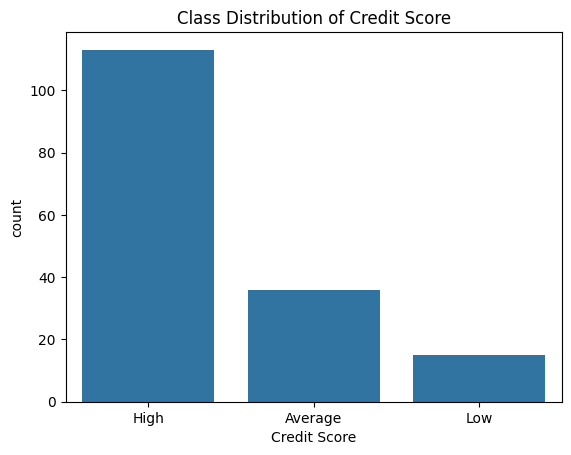

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(x='Credit Score', data=df)
plt.title("Class Distribution of Credit Score")
plt.show

df_credit = df['Credit Score'].value_counts()
print(df_credit)

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Step 1: Encode categorical features
categorical_cols = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for reverse mapping later

# Step 2: Features and target
X = df.drop(columns=['Credit Score'])  # Features
y = df['Credit Score']  # Target variable

print(X.head())

# Step 3: Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Step 4: Standardize features
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)

# Step 5: K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds
model = RandomForestClassifier(random_state=42)  # Example model

# Perform cross-validation
cv_scores = cross_val_score(model, X_smote_scaled, y_smote, cv=kf, scoring='accuracy')
# Output results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

   Age  Gender  Income  Education  Marital Status  Number of Children  \
0   25       0   50000          1               1                   0   
1   30       1  100000          4               0                   2   
2   35       0   75000          2               0                   1   
3   40       1  125000          3               1                   0   
4   45       0  100000          1               0                   3   

   Home Ownership  
0               1  
1               0  
2               0  
3               0  
4               0  
Cross-Validation Accuracy Scores: [1.         0.97058824 0.98529412 0.98529412 0.97014925]
Mean Accuracy: 0.9822651448639158


In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Step 1: Baseline Model
baseline_model = DummyClassifier(strategy='most_frequent')  # Always predicts majority class
baseline_scores = cross_val_score(baseline_model, X_smote_scaled, y_smote, cv=kf, scoring='accuracy')
print("Baseline Accuracy Scores:", baseline_scores)
print("Mean Baseline Accuracy:", baseline_scores.mean())

# Step 2: Logistic Regression Model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_scores = cross_val_score(logreg_model, X_smote_scaled, y_smote, cv=kf, scoring='accuracy')
print("\nLogistic Regression Accuracy Scores:", logreg_scores)
print("Mean Logistic Regression Accuracy:", logreg_scores.mean())

# Step 3: XGBClassifier Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_scores = cross_val_score(xgb_model, X_smote_scaled, y_smote, cv=kf, scoring='accuracy')
print("\nXGBClassifier Accuracy Scores:", xgb_scores)
print("Mean XGBClassifier Accuracy:", xgb_scores.mean())

Baseline Accuracy Scores: [0.25       0.32352941 0.25       0.32352941 0.28358209]
Mean Baseline Accuracy: 0.2861281826163301

Logistic Regression Accuracy Scores: [1.         0.97058824 0.95588235 0.97058824 0.97014925]
Mean Logistic Regression Accuracy: 0.9734416154521511


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:25:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:25:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:25:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:25:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBClassifier Accuracy Scores: [1.         0.97058824 1.         0.95588235 1.        ]
Mean XGBClassifier Accuracy: 0.9852941176470589


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:25:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [7]:
# Check the distribution of the 'Gender' column
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
0    86
1    78
Name: count, dtype: int64


In [8]:
# Split the data by gender and evaluate performance separately
df_male = df[df['Gender'] == 1]  # '0' corresponds to male
df_female = df[df['Gender'] == 0]  # '1' corresponds to female

# Evaluate performance for each group
X_male = df_male.drop(columns=['Credit Score', 'Gender'])
y_male = df_male['Credit Score']

X_female = df_female.drop(columns=['Credit Score', 'Gender'])
y_female = df_female['Credit Score']

# Apply SMOTE to balance the data for each gender group
X_male_smote, y_male_smote = smote.fit_resample(X_male, y_male)
X_female_smote, y_female_smote = smote.fit_resample(X_female, y_female)

# Standardize features
X_male_smote_scaled = scaler.fit_transform(X_male_smote)
X_female_smote_scaled = scaler.fit_transform(X_female_smote)

In [9]:
# Cross-validation for male group - RandomForestClassifier model
male_scores = cross_val_score(model, X_male_smote_scaled, y_male_smote, cv=kf, scoring='accuracy')
print("Male Group Accuracy Scores:", male_scores)
print("Mean Male Group Accuracy:", male_scores.mean())

# Cross-validation for female group - RandomForestClassifier model
female_scores = cross_val_score(model, X_female_smote_scaled, y_female_smote, cv=kf, scoring='accuracy')
print("Female Group Accuracy Scores:", female_scores)
print("Mean Female Group Accuracy:", female_scores.mean())

#-----------------------------------------------------------------------------
# Cross-validation for male group - LogisticRegression model
male_scores = cross_val_score(logreg_model, X_male_smote_scaled, y_male_smote, cv=kf, scoring='accuracy')
print("Male Group Accuracy Scores:", male_scores)
print("Mean Male Group Accuracy:", male_scores.mean())
# Cross-validation for female group - LogisticRegression model
female_scores = cross_val_score(logreg_model, X_female_smote_scaled, y_female_smote, cv=kf, scoring='accuracy')
print("Female Group Accuracy Scores:", female_scores)
print("Mean Female Group Accuracy:", female_scores.mean())

Male Group Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Male Group Accuracy: 1.0
Female Group Accuracy Scores: [1.         1.         0.97058824 1.         1.        ]
Mean Female Group Accuracy: 0.9941176470588236
Male Group Accuracy Scores: [1.         0.95652174 1.         0.91304348 1.        ]
Mean Male Group Accuracy: 0.9739130434782609
Female Group Accuracy Scores: [1.         1.         0.97058824 0.96969697 1.        ]
Mean Female Group Accuracy: 0.9880570409982175


In [11]:
# Function to evaluate model metrics including F1-score
def evaluate_model_metrics(X, y, model):
    # Ensure y is a 1D array, in case it's one-hot encoded or in other format
    if y.ndim > 1:
        y = np.argmax(y, axis=1)  # Convert one-hot to class labels

    model.fit(X, y)  # Fit the model to the given data
    y_pred = model.predict(X)

    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y, y_pred)

    return accuracy, f1, conf_matrix

# Evaluate metrics for the male group - model(RandomForestClassifier)
accuracy_male, f1_male, conf_matrix_male = evaluate_model_metrics(X_male_smote_scaled, y_male_smote, model)
print(f"Male Group Accuracy Random Forest Classifier Model: {accuracy_male}, F1-Score: {f1_male}")
print("Confusion Matrix for Male Group Random Forest Classifier Model:\n", conf_matrix_male)

# Evaluate metrics for the female group - logreg_model
accuracy_female, f1_female, conf_matrix_female = evaluate_model_metrics(X_female_smote_scaled, y_female_smote, logreg_model)
print(f"Female Group Accuracy Random Forest Classifier Model: {accuracy_female}, F1-Score: {f1_female}")
print("Confusion Matrix for Female Group Random Forest Classifier Model:\n", conf_matrix_female)
accuracy_male, f1_male, conf_matrix_male = evaluate_model_metrics(X_male_smote_scaled, y_male_smote, logreg_model)
print(f"Male Group Accuracy Logistic Regression Model: {accuracy_male}, F1-Score: {f1_male}")
print("Confusion Matrix for Male Group Logistic Regression Model:\n", conf_matrix_male)

# Evaluate metrics for the female group - logreg_model
accuracy_female, f1_female, conf_matrix_female = evaluate_model_metrics(X_female_smote_scaled, y_female_smote, logreg_model)
print(f"Female Group Accuracy Logistic Regression Model: {accuracy_female}, F1-Score: {f1_female}")
print("Confusion Matrix for Female Group Logistic Regression Model:\n", conf_matrix_female)


Male Group Accuracy Random Forest Classifier Model: 1.0, F1-Score: 1.0
Confusion Matrix for Male Group Random Forest Classifier Model:
 [[57  0]
 [ 0 57]]
Female Group Accuracy Random Forest Classifier Model: 0.9880952380952381, F1-Score: 0.9880952380952381
Confusion Matrix for Female Group Random Forest Classifier Model:
 [[55  1  0]
 [ 1 55  0]
 [ 0  0 56]]
Male Group Accuracy Logistic Regression Model: 0.9912280701754386, F1-Score: 0.9912273951519815
Confusion Matrix for Male Group Logistic Regression Model:
 [[57  0]
 [ 1 56]]
Female Group Accuracy Logistic Regression Model: 0.9880952380952381, F1-Score: 0.9880952380952381
Confusion Matrix for Female Group Logistic Regression Model:
 [[55  1  0]
 [ 1 55  0]
 [ 0  0 56]]


In [12]:
def calculate_bias_metrics(model, X, y, sensitive_attribute, groups):
    """
    Calculate bias metrics for a model based on a sensitive attribute.

    Args:
        model: The machine learning model to evaluate.
        X: Features (numpy array or DataFrame).
        y: Target labels (numpy array or Series).
        sensitive_attribute: Name of the sensitive attribute (string).
        groups: List of values in the sensitive attribute (e.g., [0, 1] for Gender).

    Returns:
        A dictionary containing bias metrics.
    """
    bias_metrics = {}
    overall_metrics = {}

    # Train and evaluate the model on the entire dataset
    model.fit(X, y)
    y_pred = model.predict(X)
    overall_accuracy = accuracy_score(y, y_pred)
    overall_f1 = f1_score(y, y_pred, average='weighted')
    overall_metrics["accuracy"] = overall_accuracy
    overall_metrics["f1_score"] = overall_f1

    bias_metrics["overall"] = overall_metrics

    # Calculate metrics for each group
    group_metrics = {}
    for group in groups:
        # Filter data for the current group
        group_indices = (X[sensitive_attribute] == group)
        X_group = X[group_indices].drop(columns=[sensitive_attribute])
        y_group = y[group_indices]

        # Train and evaluate on the group's data
        model.fit(X_group, y_group)
        y_group_pred = model.predict(X_group)
        accuracy = accuracy_score(y_group, y_group_pred)
        f1 = f1_score(y_group, y_group_pred, average='weighted')
        group_metrics[group] = {
            "accuracy": accuracy,
            "f1_score": f1
        }

    bias_metrics["group_metrics"] = group_metrics

    # Calculate bias scores
    group_0 = group_metrics[groups[0]]
    group_1 = group_metrics[groups[1]]

    bias_metrics["bias_score"] = {
        "accuracy_diff": abs(group_0["accuracy"] - group_1["accuracy"]),
        "f1_score_diff": abs(group_0["f1_score"] - group_1["f1_score"]),
        "accuracy_ratio": min(group_0["accuracy"], group_1["accuracy"]) / max(group_0["accuracy"], group_1["accuracy"]),
        "f1_score_ratio": min(group_0["f1_score"], group_1["f1_score"]) / max(group_0["f1_score"], group_1["f1_score"]),
    }

    return bias_metrics

In [13]:
# Sensitive attribute: 'Gender' (0=female, 1=male) - logreg_model
sensitive_attribute = 'Gender'
groups = [0, 1]

bias_metrics_logreg = calculate_bias_metrics(
    model=logreg_model,
    X=df.drop(columns=['Credit Score']),
    y=df['Credit Score'],
    sensitive_attribute=sensitive_attribute,
    groups=groups
)

print('Logistic Regression Model:', bias_metrics_logreg)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model: {'overall': {'accuracy': 0.9878048780487805, 'f1_score': 0.9878048780487805}, 'group_metrics': {0: {'accuracy': 0.9883720930232558, 'f1_score': 0.9885072619506228}, 1: {'accuracy': 1.0, 'f1_score': 1.0}}, 'bias_score': {'accuracy_diff': 0.011627906976744207, 'f1_score_diff': 0.011492738049377227, 'accuracy_ratio': 0.9883720930232558, 'f1_score_ratio': 0.9885072619506228}}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


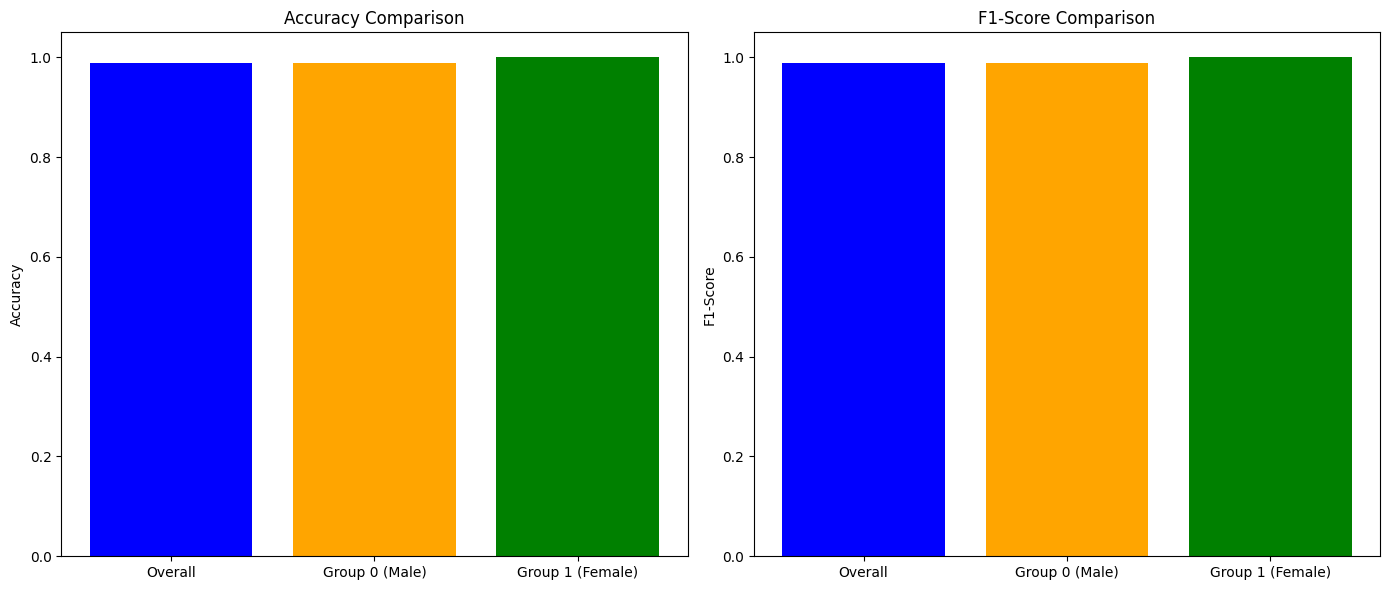

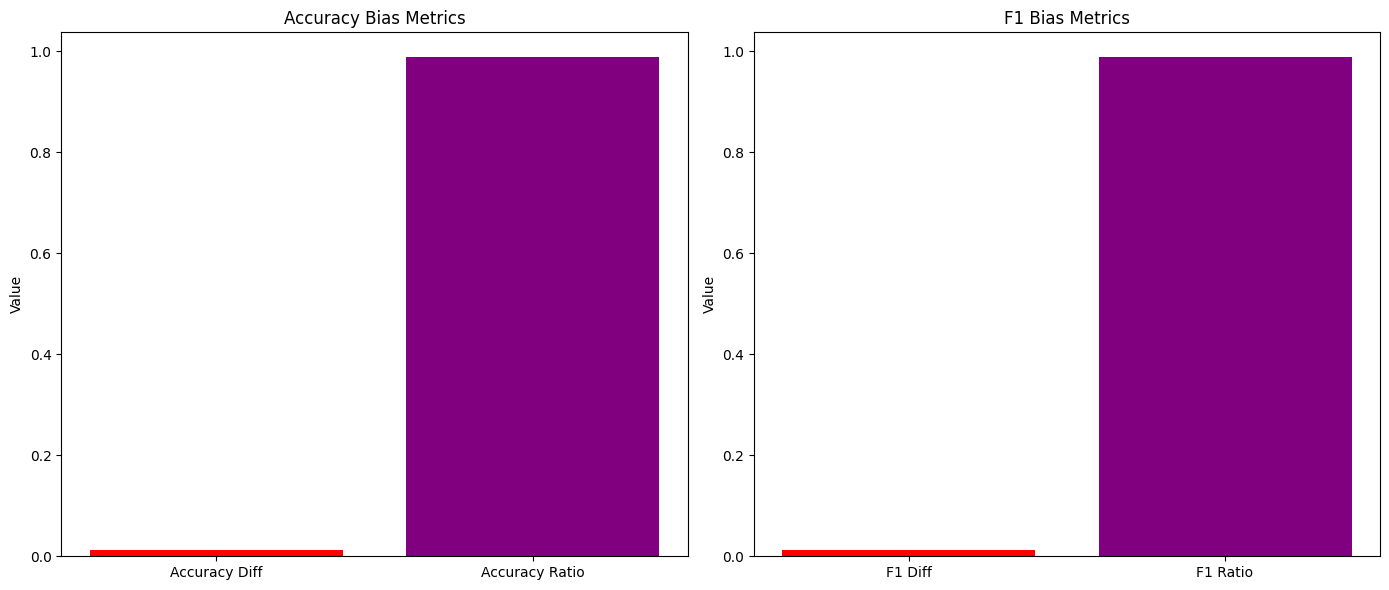

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant data from bias_metrics_logreg
overall_accuracy = bias_metrics_logreg['overall']['accuracy']
overall_f1 = bias_metrics_logreg['overall']['f1_score']
group_0_accuracy = bias_metrics_logreg['group_metrics'][0]['accuracy']
group_0_f1 = bias_metrics_logreg['group_metrics'][0]['f1_score']
group_1_accuracy = bias_metrics_logreg['group_metrics'][1]['accuracy']
group_1_f1 = bias_metrics_logreg['group_metrics'][1]['f1_score']

# Bias scores
accuracy_diff = bias_metrics_logreg['bias_score']['accuracy_diff']
f1_diff = bias_metrics_logreg['bias_score']['f1_score_diff']
accuracy_ratio = bias_metrics_logreg['bias_score']['accuracy_ratio']
f1_ratio = bias_metrics_logreg['bias_score']['f1_score_ratio']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Plot for Accuracy and F1-Score comparison
labels = ['Overall', 'Group 0 (Male)', 'Group 1 (Female)']
accuracy_values = [overall_accuracy, group_0_accuracy, group_1_accuracy]
f1_values = [overall_f1, group_0_f1, group_1_f1]

# Plot Accuracy
axes[0].bar(labels, accuracy_values, color=['blue', 'orange', 'green'])
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylabel('Accuracy')

# Plot F1-Score
axes[1].bar(labels, f1_values, color=['blue', 'orange', 'green'])
axes[1].set_title('F1-Score Comparison')
axes[1].set_ylabel('F1-Score')

# Show the plot
plt.tight_layout()
plt.show()

# Plot Bias Metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Plot Accuracy Bias Scores
axes[0].bar(['Accuracy Diff', 'Accuracy Ratio'], [accuracy_diff, accuracy_ratio], color=['red', 'purple'])
axes[0].set_title('Accuracy Bias Metrics')
axes[0].set_ylabel('Value')

# Plot F1 Bias Scores
axes[1].bar(['F1 Diff', 'F1 Ratio'], [f1_diff, f1_ratio], color=['red', 'purple'])
axes[1].set_title('F1 Bias Metrics')
axes[1].set_ylabel('Value')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
df['Marital Status']. value_counts()

,count
Marital Status,
0,87
1,77


In [16]:
# Sensitive attribute: 'Marital Status' (0=Married, 1=Single)
sensitive_attribute = 'Marital Status'
groups = [0, 1]

bias_metrics_marriage = calculate_bias_metrics(
    model=logreg_model,
    X=df.drop(columns=['Credit Score']),
    y=df['Credit Score'],
    sensitive_attribute=sensitive_attribute,
    groups=groups
)

print('Marital Status Bias, Logistic Regression:', bias_metrics_marriage)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Marital Status Bias, Logistic Regression: {'overall': {'accuracy': 0.9878048780487805, 'f1_score': 0.9878048780487805}, 'group_metrics': {0: {'accuracy': 1.0, 'f1_score': 1.0}, 1: {'accuracy': 0.987012987012987, 'f1_score': 0.9869890320483207}}, 'bias_score': {'accuracy_diff': 0.012987012987012991, 'f1_score_diff': 0.01301096795167933, 'accuracy_ratio': 0.987012987012987, 'f1_score_ratio': 0.9869890320483207}}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


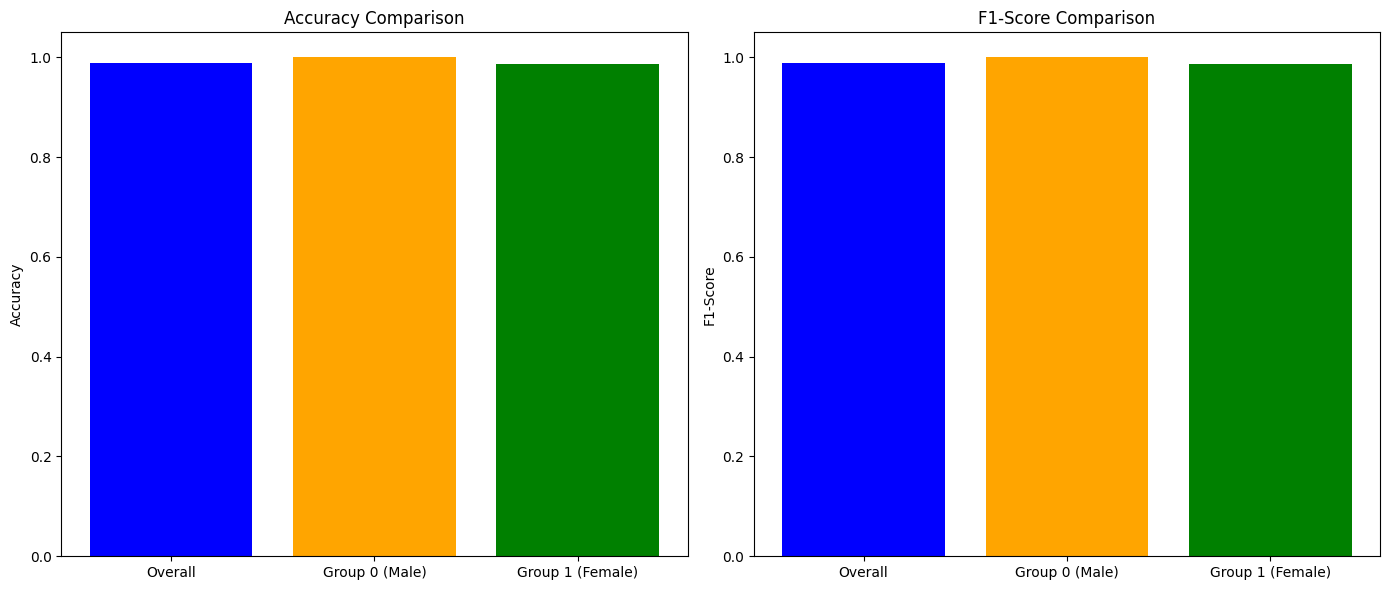

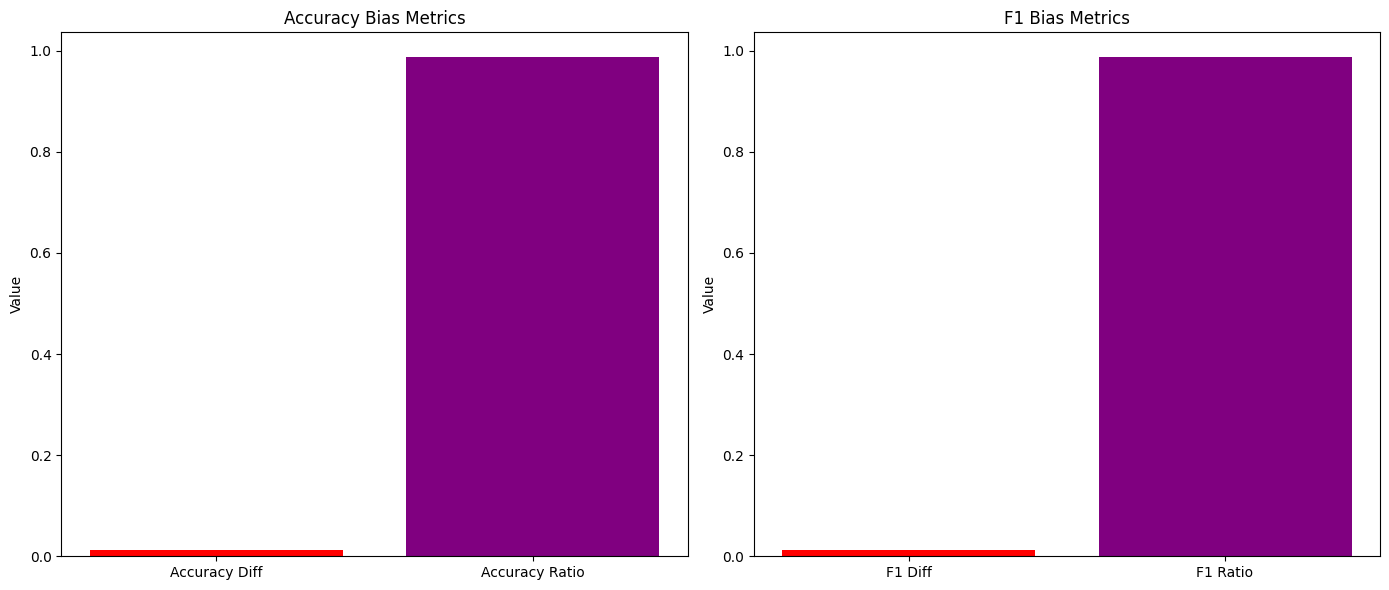

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant data from bias_metrics
overall_accuracy = bias_metrics_marriage['overall']['accuracy']
overall_f1 = bias_metrics_marriage['overall']['f1_score']
group_0_accuracy = bias_metrics_marriage['group_metrics'][0]['accuracy']
group_0_f1 = bias_metrics_marriage['group_metrics'][0]['f1_score']
group_1_accuracy = bias_metrics_marriage['group_metrics'][1]['accuracy']
group_1_f1 = bias_metrics_marriage['group_metrics'][1]['f1_score']

# Bias scores
accuracy_diff = bias_metrics_marriage['bias_score']['accuracy_diff']
f1_diff = bias_metrics_marriage['bias_score']['f1_score_diff']
accuracy_ratio = bias_metrics_marriage['bias_score']['accuracy_ratio']
f1_ratio = bias_metrics_marriage['bias_score']['f1_score_ratio']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Plot for Accuracy and F1-Score comparison
labels = ['Overall', 'Group 0 (Male)', 'Group 1 (Female)']
accuracy_values = [overall_accuracy, group_0_accuracy, group_1_accuracy]
f1_values = [overall_f1, group_0_f1, group_1_f1]

# Plot Accuracy
axes[0].bar(labels, accuracy_values, color=['blue', 'orange', 'green'])
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylabel('Accuracy')

# Plot F1-Score
axes[1].bar(labels, f1_values, color=['blue', 'orange', 'green'])
axes[1].set_title('F1-Score Comparison')
axes[1].set_ylabel('F1-Score')

# Show the plot
plt.tight_layout()
plt.show()
# Plot Bias Metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Accuracy Bias Scores
axes[0].bar(['Accuracy Diff', 'Accuracy Ratio'], [accuracy_diff, accuracy_ratio], color=['red', 'purple'])
axes[0].set_title('Accuracy Bias Metrics')
axes[0].set_ylabel('Value')

# Plot F1 Bias Scores
axes[1].bar(['F1 Diff', 'F1 Ratio'], [f1_diff, f1_ratio], color=['red', 'purple'])
axes[1].set_title('F1 Bias Metrics')
axes[1].set_ylabel('Value')

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

# Step 1: Encode categorical features
categorical_cols = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 2: Features and target
X = df.drop(columns=['Credit Score'])  # Features
y = df['Credit Score']  # Target variable

# Step 3: Calculate Sample Weights
gender_counts = df['Gender'].value_counts().to_dict()
marital_counts = df['Marital Status'].value_counts().to_dict()

total_samples = len(df)
num_gender_groups = len(gender_counts)
num_marital_groups = len(marital_counts)

# Calculate weights
gender_weights = {k: total_samples / (v * num_gender_groups) for k, v in gender_counts.items()}
marital_weights = {k: total_samples / (v * num_marital_groups) for k, v in marital_counts.items()}

# Combine weights
df['sample_weight'] = df.apply(lambda row: gender_weights[row['Gender']] * marital_weights[row['Marital Status']], axis=1)

# Step 4: Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
# Step 5: Adjust Sample Weights for SMOTE
# Map the weights based on the original dataset
weights_dict = df['sample_weight'].to_dict()
sample_weights_smote = [weights_dict.get(idx % len(df), 1) for idx in range(len(y_smote))]

# Step 6: Standardize features
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)

# Step 7: K-Fold Cross-Validation with Sample Weights
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

cv_scores = []
for train_idx, test_idx in kf.split(X_smote_scaled):
    X_train, X_test = X_smote_scaled[train_idx], X_smote_scaled[test_idx]
    y_train, y_test = y_smote[train_idx], y_smote[test_idx]
    weights_train = np.array(sample_weights_smote)[train_idx]

    model.fit(X_train, y_train, sample_weight=weights_train)
    acc = model.score(X_test, y_test)
    cv_scores.append(acc)

# Output results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Baseline Model
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_scores = cross_val_score(baseline_model, X_smote_scaled, y_smote, cv=kf)
print("\nBaseline Accuracy Scores:", baseline_scores)
print("Mean Baseline Accuracy:", np.mean(baseline_scores))

Cross-Validation Accuracy Scores: [1.0, 0.9705882352941176, 0.9852941176470589, 0.9852941176470589, 0.9850746268656716]
Mean Accuracy: 0.9852502194907814

Baseline Accuracy Scores: [0.25       0.32352941 0.25       0.32352941 0.28358209]
Mean Baseline Accuracy: 0.2861281826163301


In [19]:
!pip install aif360
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from aif360.algorithms.preprocessing import LFR
from aif360.datasets import StandardDataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.6 MB/s eta 0:00:00


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [20]:
# Step 1: Prepare the dataset
dataset = StandardDataset(
    df,
    label_name='Credit Score',
    favorable_classes=[1],  # Replace with appropriate class label
    protected_attribute_names=['Gender'],  # Focus on Gender first
    privileged_classes=[[1]]  # Male is privileged
)

# Step 2: Split dataset into train and test
train, test = dataset.split([0.7], shuffle=True, seed=42)

# Step 3: Apply LFR for Gender
lfr_gender = LFR(
    privileged_groups=[{'Gender': 0}],  # Adjust based on your dataset
    unprivileged_groups=[{'Gender': 1}],
    k=10, Ax=0.5, Ay=1.5, Az=1.0  # Reuse or tune the parameters
)
# Train LFR for Gender
lfr_gender.fit(train)

# Transform the dataset
train_transf_gender = lfr_gender.transform(train)
test_transf_gender = lfr_gender.transform(test)

print("LFR transformation for Gender complete!")

LFR transformation for Gender complete!


In [21]:
# Step 1: Prepare the dataset for Marital Status
dataset = StandardDataset(
    df,
    label_name='Credit Score',
    favorable_classes=[1],  # Replace with appropriate class label
    protected_attribute_names=['Marital Status'],  # Focus on Marital Status
    privileged_classes=[[0]]  # Married is privileged
)

# Step 2: Split dataset into train and test
train, test = dataset.split([0.7], shuffle=True, seed=42)

# Step 3: Apply LFR with Best Parameters for Marital Status
lfr_marital = LFR(
    privileged_groups=[{'Marital Status': 0}],
    unprivileged_groups=[{'Marital Status': 1}],
    k=10, Ax=0.5, Ay=1.5, Az=1.0
)
# Train LFR with best parameters
lfr_marital.fit(train)

# Transform the dataset
train_transf_marital = lfr_marital.transform(train)
test_transf_marital = lfr_marital.transform(test)

print("LFR transformation with best parameters for Marital Status complete!")

LFR transformation with best parameters for Marital Status complete!


In [22]:
# Gender Transformation
X_train_gender = train_transf_gender.features
y_train_gender = train_transf_gender.labels.ravel()
X_test_gender = test_transf_gender.features
y_test_gender = test_transf_gender.labels.ravel()

# Train the model for Gender
model_gender = RandomForestClassifier(random_state=42)
model_gender.fit(X_train_gender, y_train_gender)
y_pred_gender = model_gender.predict(X_test_gender)

# Evaluate the performance
accuracy_gender = accuracy_score(y_test_gender, y_pred_gender)
f1_gender = f1_score(y_test_gender, y_pred_gender, average='weighted')
print("Gender:")
print(f"Accuracy: {accuracy_gender:.4f}")
print(f"F1-Score: {f1_gender:.4f}")

Gender:
Accuracy: 1.0000
F1-Score: 1.0000


In [23]:
# Step 2: Marital Status Transformation
X_train_marital = train_transf_marital.features
y_train_marital = train_transf_marital.labels.ravel()
X_test_marital = test_transf_marital.features
y_test_marital = test_transf_marital.labels.ravel()

# Step 3: Train the model for Marital Status
model_marital = RandomForestClassifier(random_state=42)
model_marital.fit(X_train_marital, y_train_marital)
y_pred_marital = model_marital.predict(X_test_marital)

# Step 4: Evaluate the performance
accuracy_marital = accuracy_score(y_test_marital, y_pred_marital)
f1_marital = f1_score(y_test_marital, y_pred_marital, average='weighted')
print("\nMarital Status (Updated):")
print(f"Accuracy: {accuracy_marital:.4f}")
print(f"F1-Score: {f1_marital:.4f}")


Marital Status (Updated):
Accuracy: 1.0000
F1-Score: 1.0000


In [24]:
from aif360.metrics import BinaryLabelDatasetMetric

# Gender fairness metrics
metric_gender = BinaryLabelDatasetMetric(
    test_transf_gender,
    privileged_groups=[{'Gender': 1}],  # Male
    unprivileged_groups=[{'Gender': 0}]  # Female
)
print("\nFairness Metrics for Gender:")
print(f"Disparate Impact (Demographic Parity): {metric_gender.disparate_impact():.4f}")
print(f"Statistical Parity Difference: {metric_gender.statistical_parity_difference():.4f}")

# Marital Status fairness metrics
metric_marital = BinaryLabelDatasetMetric(
    test_transf_marital,
    privileged_groups=[{'Marital Status': 0}],  # Married
    unprivileged_groups=[{'Marital Status': 1}]  # Single
)
print("\nFairness Metrics for Marital Status (Updated):")
print(f"Disparate Impact (Demographic Parity): {metric_marital.disparate_impact():.4f}")
print(f"Statistical Parity Difference: {metric_marital.statistical_parity_difference():.4f}")


Fairness Metrics for Gender:
Disparate Impact (Demographic Parity): 0.4213
Statistical Parity Difference: -0.4006

Fairness Metrics for Marital Status (Updated):
Disparate Impact (Demographic Parity): 0.6011
Statistical Parity Difference: -0.2445


In [25]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_smote_scaled, y_smote)
import joblib
joblib.dump(best_model, "credit_score_model.pkl")


['credit_score_model.pkl']

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib

# Sample data (replace with your actual dataset)
# Assuming you have 'X' (features) and 'y' (labels) from your dataset
# Example: X = your_dataframe.drop(columns=['target'])
# Example: y = your_dataframe['target']

# Load your dataset (replace this with your actual dataset loading code)
# X, y = ...

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_smote_scaled, y_smote)

# Save the model using joblib
joblib.dump(best_model, "credit_score_model.pkl")

# Load the saved model
loaded_model = joblib.load("credit_score_model.pkl")

# Example: Predict on new data (7 features required)
# Modify the new_data to include 7 features (e.g., age, income, etc.)
# Example values for all 7 features
new_data = np.array([[30, 15000, 5, 0, 300, 1, 1]])  # Replace with actual feature values

# Ensure new_data has the correct shape (2D array)
new_data = new_data.reshape(1, -1)  # Reshaping to 1 row, 7 columns

# Predict the credit score category
prediction = loaded_model.predict(new_data)

# Define a mapping for the prediction categories
category_mapping = {
    0: "Poor Credit Score",
    1: "Good Credit Score"
}

# Get the predicted category description
predicted_category = category_mapping[prediction[0]]

# Print the result
print(f"Predicted Credit Score Category: {predicted_category}")


Predicted Credit Score Category: Good Credit Score
